In [10]:
# This code is used for JHU Medical Image Analysis Project
# Copyright: Zhaoshuo Li
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as functional
from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
import torchvision.transforms.functional as TF

import copy
import numpy as np
import random
# from tensorboardX import SummaryWriter

from dataset import *
from visualization import *
from dice_loss import *
from model_training import *
from albumentations import *
from unet import *

In [3]:
# os.environ["CUDA_VISIBLE_DEVICES"]="2"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda


# Seed pytorch and numpy and random

In [4]:
# IMPORTANT!
# must seed the same value each time when training a new network
seed = 256
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
pretrain_seed = 128

## Hyperparameters

In [5]:
train_batch_size = 10
validation_batch_size=10
learning_rate = 0.001
num_epochs = 70
num_class = 12

In [6]:
dice_loss = DICELoss(np.ones((num_class,1))) 

## Visualization

In [7]:
# Initialize the visualization environment
writer = SummaryWriter()

NameError: name 'SummaryWriter' is not defined

## Unet

In [8]:
# initialize model
model = unet(useBN=True)
model.to(device)

RuntimeError: CUDA error: unknown error

## Optimizer and Scheduler and loss

In [12]:
# intialize optimizer and lr decay
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

## Baseline, without augmentation

In [13]:
# IMPORTANT!
# must seed the same value each time when training a new network
seed = 256
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

In [10]:
# define transform
train_both_aug = Compose([
        RandomCrop(height=256, width=256, p=1),
    ])
train_img_aug = Compose([
        Normalize(p=1,mean=np.array([0.5,]),std=np.array([0.5,])),
    ])

val_both_aug = Compose([
        RandomCrop(height=256, width=256, p=1),
    ])
val_img_aug = Compose([
        Normalize(p=1,mean=np.array([0.5,]),std=np.array([0.5,])),
    ])

train_dataset=ACDCDataset(data_type="train",transform_both=train_both_aug,transform_image=train_img_aug)
validation_dataset=ACDCDataset(data_type="validation",transform_both=val_both_aug,transform_image=val_img_aug)

# # show one example
# img,label = train_dataset.__getitem__(0)
# imshow(img.permute(1,2,0),denormalize=True)
# colorlabel = train_dataset.label_converter.label2color(label.permute(1,2,0))
# imshow(colorlabel)

# # show one example
# img,label = validation_dataset.__getitem__(0)
# imshow(img.permute(1,2,0),denormalize=True)
# colorlabel = train_dataset.label_converter.label2color(label.permute(1,2,0))
# imshow(colorlabel)

In [11]:
# intialize the dataloader
train_generator = DataLoader(train_dataset,shuffle=True,batch_size=train_batch_size,num_workers=8)
validation_generator = DataLoader(validation_dataset,shuffle=True,batch_size=validation_batch_size,num_workers=8)

## Start training

Training Started!

EPOCH 1 of 70

0 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


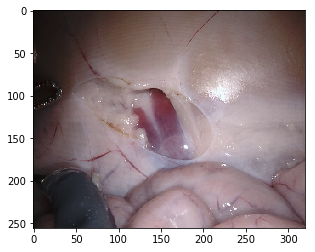

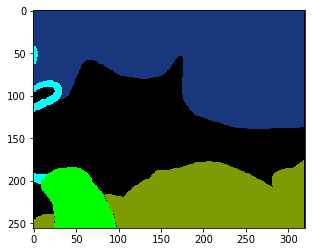

1 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


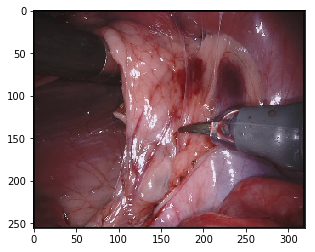

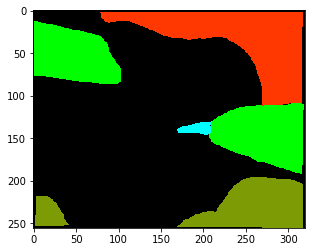

2 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


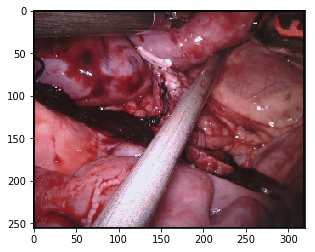

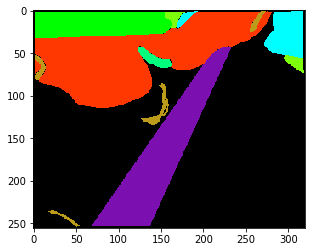

3 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


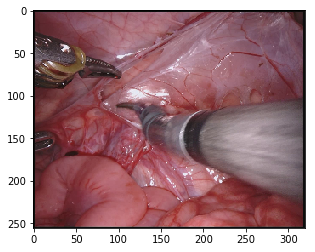

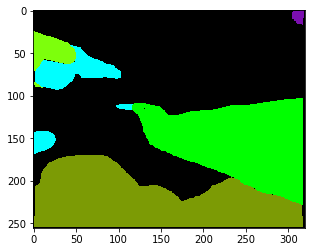

4 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


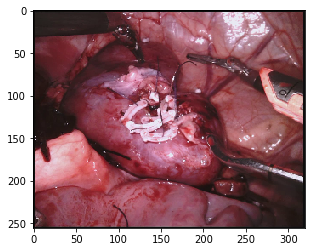

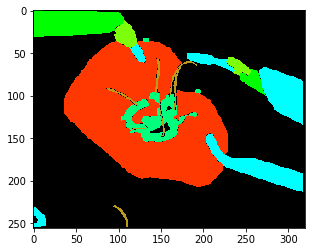

5 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


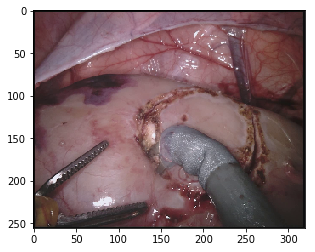

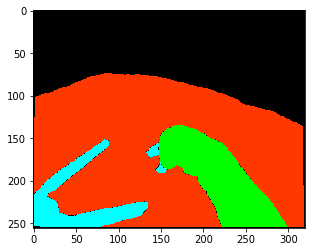

6 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


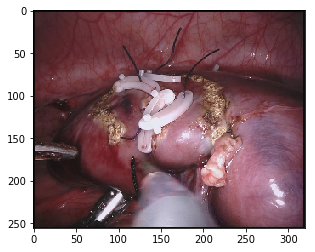

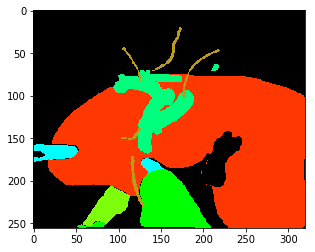

7 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


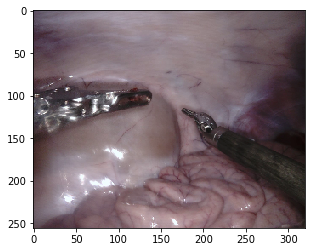

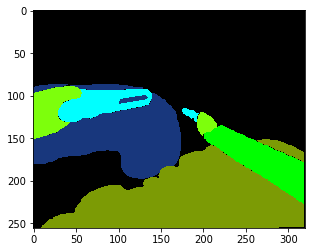

8 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


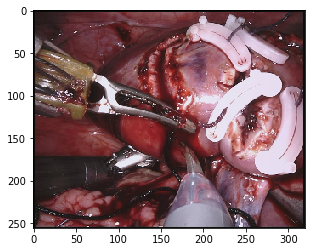

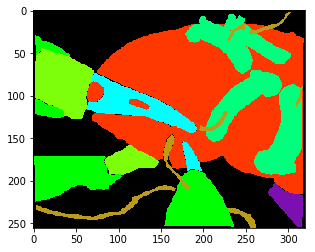

9 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


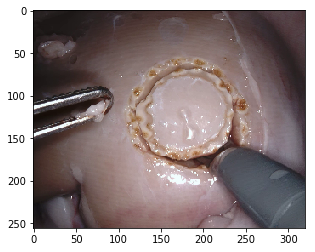

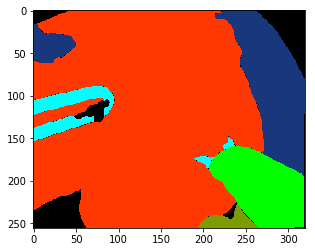

10 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


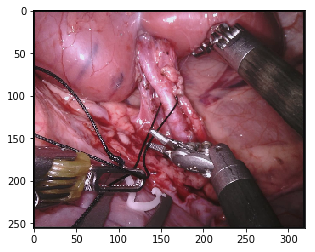

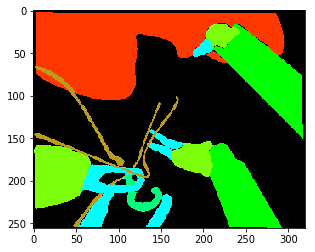

11 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


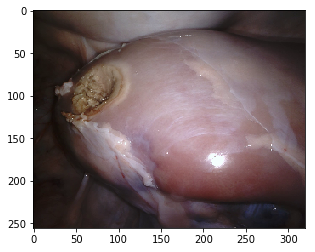

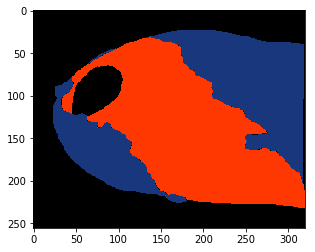

12 torch.Size([10, 3, 256, 320]) torch.Size([10, 1, 256, 320])


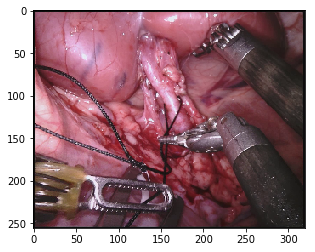

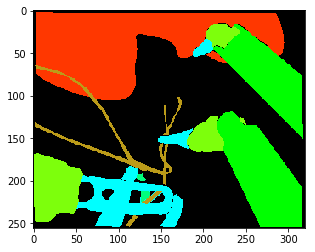

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/zli122/anaconda3/lib/python3.7/multiprocessing/connection.py", 

KeyboardInterrupt: 

In [12]:
best_model_wts = run_training(model,device,num_class,scheduler,optimizer,dice_loss,num_epochs,train_generator,train_dataset,validation_generator,validation_dataset,writer)

In [ ]:
## load best model weights
model.load_state_dict(best_model_wts)
## save model
torch.save(model.state_dict(), 'vanilla_trained_unet.pt')

## Test

In [ ]:
# load test dataset
test_dataset=MICCAIDataset_test(data_type = "test", transform=None)
test_generator=DataLoader(test_dataset,shuffle=False,batch_size=4,num_workers=8)

In [18]:
# load model
model.load_state_dict(torch.load('vanilla_trained_unet.pt'))
model.to(device)
print("Model loaded")

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location='cpu' to map your storages to the CPU.

In [ ]:
final_dice = test(model,device,dice_loss,num_class,test_generator,test_dataset,writer)

## Augmentation

## Save model as ONNX

In [ ]:
dummy_input = torch.randn(10, 10, 256, 256, device='cpu')
torch.onnx.export(model, dummy_input, "unet.onnx", verbose=True)

In [ ]:
# print learnt weights to verify MATLAB has correctly imported them
for name, param in model.named_parameters():
    print (name, param.data)